# Images and matrix algebra in Python

### The **cbook** library

https://matplotlib.org/stable/api/cbook_api.html

In [1]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

To open images, we can use get_sample_data()

In [2]:
# The image below was taken from:
# https://en.wikipedia.org/wiki/Cotopaxi#/media/File:Cotopaxi_volcano_2008-06-27T1322.jpg

image_file = cbook.get_sample_data('/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/pre-class/Cotopaxi.jpg')

type(image_file)

_io.BufferedReader

We can use imread() to read images:

In [3]:
image = plt.imread(image_file)

type(image)

# Now we have an array

numpy.ndarray

### Rasters

### The imshow() function

This function can be called to display data as an image on a 2D regular raster.

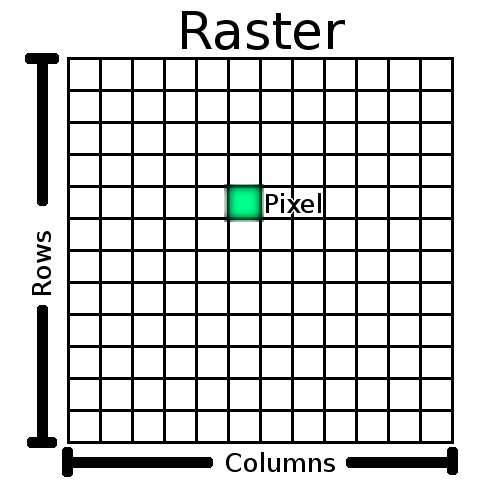

Image taken from: https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/raster_data.html

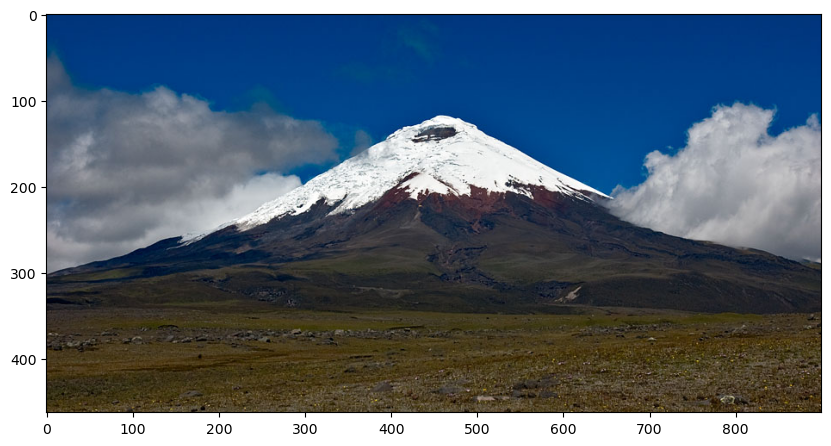

In [4]:
# Figure enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(image)
plt.show()

### How is an image composed?

In [5]:
print(image.shape)

(462, 900, 3)


An image is composed of several layers. In this case, RGB format, we have 3 layers.

R -> pixels can take values between 0, 255 (intensity)


B -> pixels can take values between 0, 255 (intensity)


G -> pixels can take values between 0, 255 (intensity)

In [6]:
imageR = image[:,:,0]
imageB = image[:,:,1]
imageG = image[:,:,2]

In [7]:
print(imageR.shape)

(462, 900)


# Plotting 

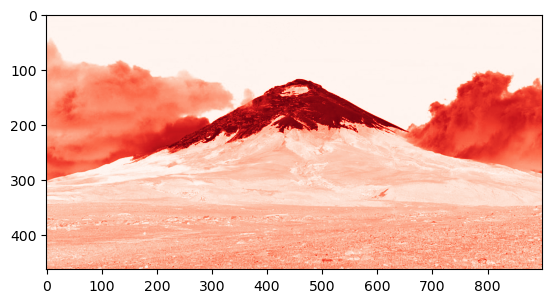

In [8]:
fig, ax = plt.subplots()
ax.imshow(imageR, cmap="Reds")
#ax.axis('off')  # clear x- and y-axes
plt.show()

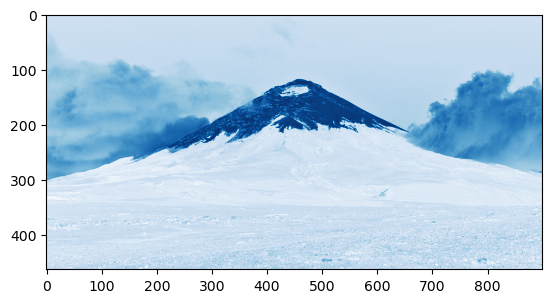

In [9]:
fig, ax = plt.subplots()
ax.imshow(imageB, cmap="Blues")
#ax.axis('off')  # clear x- and y-axes
plt.show()

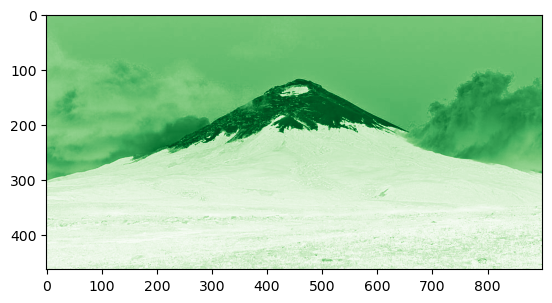

In [10]:
fig, ax = plt.subplots()
ax.imshow(imageG, cmap="Greens")
#ax.axis('off')  # clear x- and y-axes
plt.show()

#### Important

- Images are layered matrices of the form ($m\times n$)!

- We can then use linear algebra and all sort of linear operations on them.

- Computationally speaking images are arrays.

In [11]:
print(imageR.shape)

print(imageR)

(462, 900)
[[  2   2   2 ...   0   0   0]
 [  2   2   2 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [ 95  92 108 ...  65  30  58]
 [ 67  64  84 ...  71  26  37]
 [ 78  59  67 ...  84  50  53]]


In [12]:
print(imageB.shape)

print(imageB)

(462, 900)
[[52 52 52 ... 52 52 52]
 [52 52 52 ... 52 52 52]
 [51 51 51 ... 52 52 52]
 ...
 [79 76 92 ... 48 12 39]
 [51 48 68 ... 54  8 18]
 [62 43 51 ... 67 33 35]]


In [13]:
print(imageG.shape)

print(imageG)

(462, 900)
[[121 121 121 ... 122 122 122]
 [121 121 121 ... 122 122 122]
 [120 120 120 ... 122 122 122]
 ...
 [ 43  40  56 ...  20   0  22]
 [ 15  12  32 ...  26   0   1]
 [ 26   7  15 ...  39   7  11]]


In [14]:
import numpy as np


In [15]:
print(np.mean(imageG))

print(np.max(imageG))

print(np.min(imageG))

96.59413660413661
255
0


In [16]:
print(np.mean(imageR))

print(np.max(imageR))

print(np.min(imageR))

62.511048581048584
255
0


### Pixel histograms:

If we have 2D arrays, it is better to linearise them/reshape them into 1D arrays.


See documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [17]:
imageR_1D = np.reshape(imageR,(415800,1))

imageB_1D = np.reshape(imageB,(415800,1))

imageG_1D = np.reshape(imageG,(415800,1))

print(imageR_1D.shape)

(415800, 1)


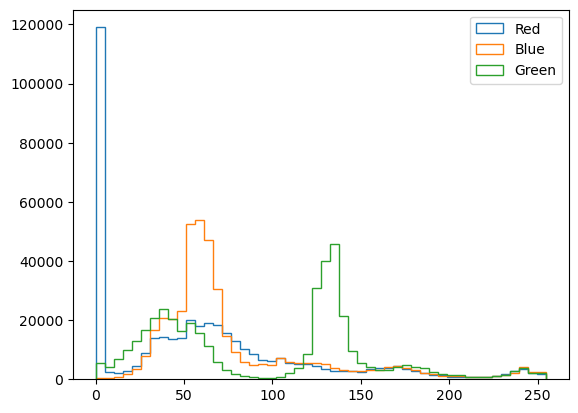

In [18]:
plt.hist(imageR_1D, bins=50, histtype='step', label='Red')

plt.hist(imageB_1D, bins=50, histtype='step', label='Blue')

plt.hist(imageG_1D, bins=50, histtype='step', label='Green')

plt.legend()
plt.show()

### Transpose:

In [19]:
imageR_trasnpose = imageR.transpose()

print(imageR.shape)
print(imageR_trasnpose.shape)


(462, 900)
(900, 462)


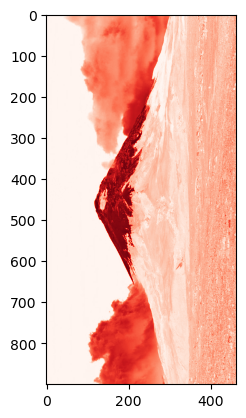

In [20]:
fig, ax = plt.subplots()
ax.imshow(imageR_trasnpose, cmap="Reds")
#ax.axis('off')  # clear x- and y-axes
plt.show()

#### Adding matrices:

In [21]:
D = imageR + imageB + imageG

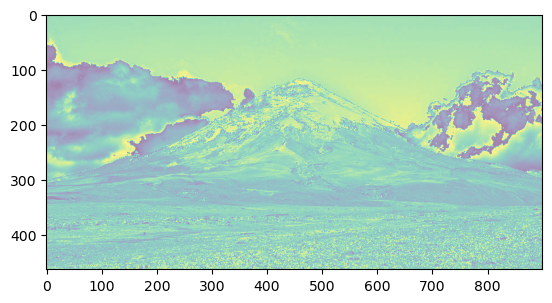

In [22]:
fig, ax = plt.subplots()
ax.imshow(D, cmap = "viridis", alpha=0.5)
#ax.axis('off')  # clear x- and y-axes
plt.show()

### Image masking

See documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html

In [23]:
import matplotlib.patches as patches

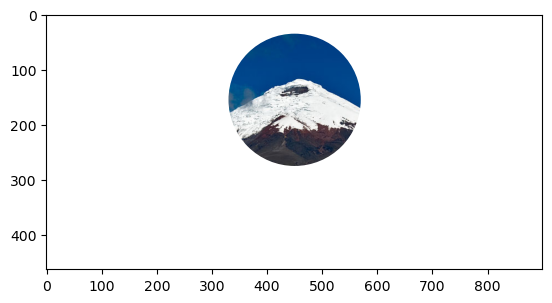

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(image)

# Masking the image using patches
#patch = patches.Ellipse((450, 14),width =400, height=550, angle=-45.0, transform=ax.transData)
patch = patches.Circle((450, 154), radius=120, transform=ax.transData)
im.set_clip_path(patch)

#ax.axis('off')  # clear x- and y-axes
plt.show()

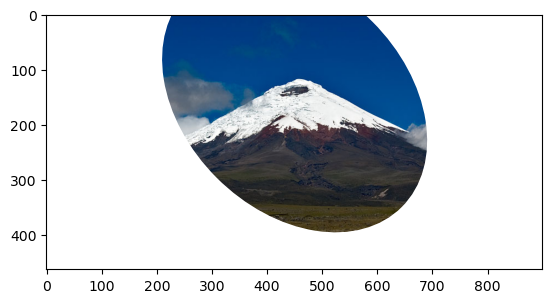

In [25]:
fig, ax = plt.subplots()
im = ax.imshow(image)

# Masking the image using patches
patch = patches.Ellipse((450, 154),width =400, height=550, angle=-45.0, transform=ax.transData)
#patch = patches.Circle((450, 154), radius=120, transform=ax.transData)
im.set_clip_path(patch)

#ax.axis('off')  # clear x- and y-axes
plt.show()